In [153]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import sklearn 

# DATA READING 

In [154]:
train=pd.read_csv("train_2v.csv")
test=pd.read_csv("test_2v.csv")

In [155]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [156]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [157]:
train.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0
43399,36271,Female,82.0,0,0,Yes,Private,Urban,79.48,20.6,never smoked,0


In [158]:
test.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
18596,67353,Male,20.0,0,0,No,Private,Rural,74.43,18.4,formerly smoked
18597,362,Male,61.0,0,0,Yes,Govt_job,Rural,211.55,31.6,smokes
18598,29839,Female,79.0,0,0,Yes,Private,Rural,125.74,29.4,never smoked
18599,6438,Male,55.0,0,0,Yes,Govt_job,Rural,69.46,33.8,never smoked
18600,16770,Female,38.0,0,0,No,Private,Rural,91.23,24.4,NaN


In [159]:
train.shape

(43400, 12)

In [160]:
test.shape

(18601, 11)

In [161]:
train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [162]:
test.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [163]:
train.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [164]:
train.describe(include="object")

,gender,ever_married,work_type,Residence_type,smoking_status
count,43400,43400,43400,43400,30108
unique,3,2,5,2,3
top,Female,Yes,Private,Urban,never smoked
freq,25665,27938,24834,21756,16053


In [165]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [166]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18601 entries, 0 to 18600
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 18601 non-null  int64  
 1   gender             18601 non-null  object 
 2   age                18601 non-null  float64
 3   hypertension       18601 non-null  int64  
 4   heart_disease      18601 non-null  int64  
 5   ever_married       18601 non-null  object 
 6   work_type          18601 non-null  object 
 7   Residence_type     18601 non-null  object 
 8   avg_glucose_level  18601 non-null  float64
 9   bmi                18010 non-null  float64
 10  smoking_status     12850 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 1.6+ MB


# DATA CLEANING 

In [167]:
# IDENTYFING MISSING VALUES 

In [168]:
train_missing_values=train.isnull().sum()
train_missing_values

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [169]:
test_missing_values=test.isnull().sum()
test_missing_values

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   591
smoking_status       5751
dtype: int64

In [170]:
print("Totl missing in test dataset:",test.isnull().sum().sum())
print("total missing in train dataset:",train.isnull().sum().sum())

Totl missing in test dataset: 6342
total missing in train dataset: 14754


In [171]:
# letsfind percentage of missing values 

In [172]:
percentage_missing_train_values= (train.isnull().sum()/len(train))*100
print("missing value percentage train:",percentage_missing_train_values)

missing value percentage train: id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.368664
smoking_status       30.626728
stroke                0.000000
dtype: float64


In [173]:
percentage_missing_test_values=(test.isnull().sum()/len(test))*100
print("percentage missing test value:",percentage_missing_test_values)

percentage missing test value: id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.177249
smoking_status       30.917693
dtype: float64


In [174]:
# lets visualize the  missing vlaues in both the data 

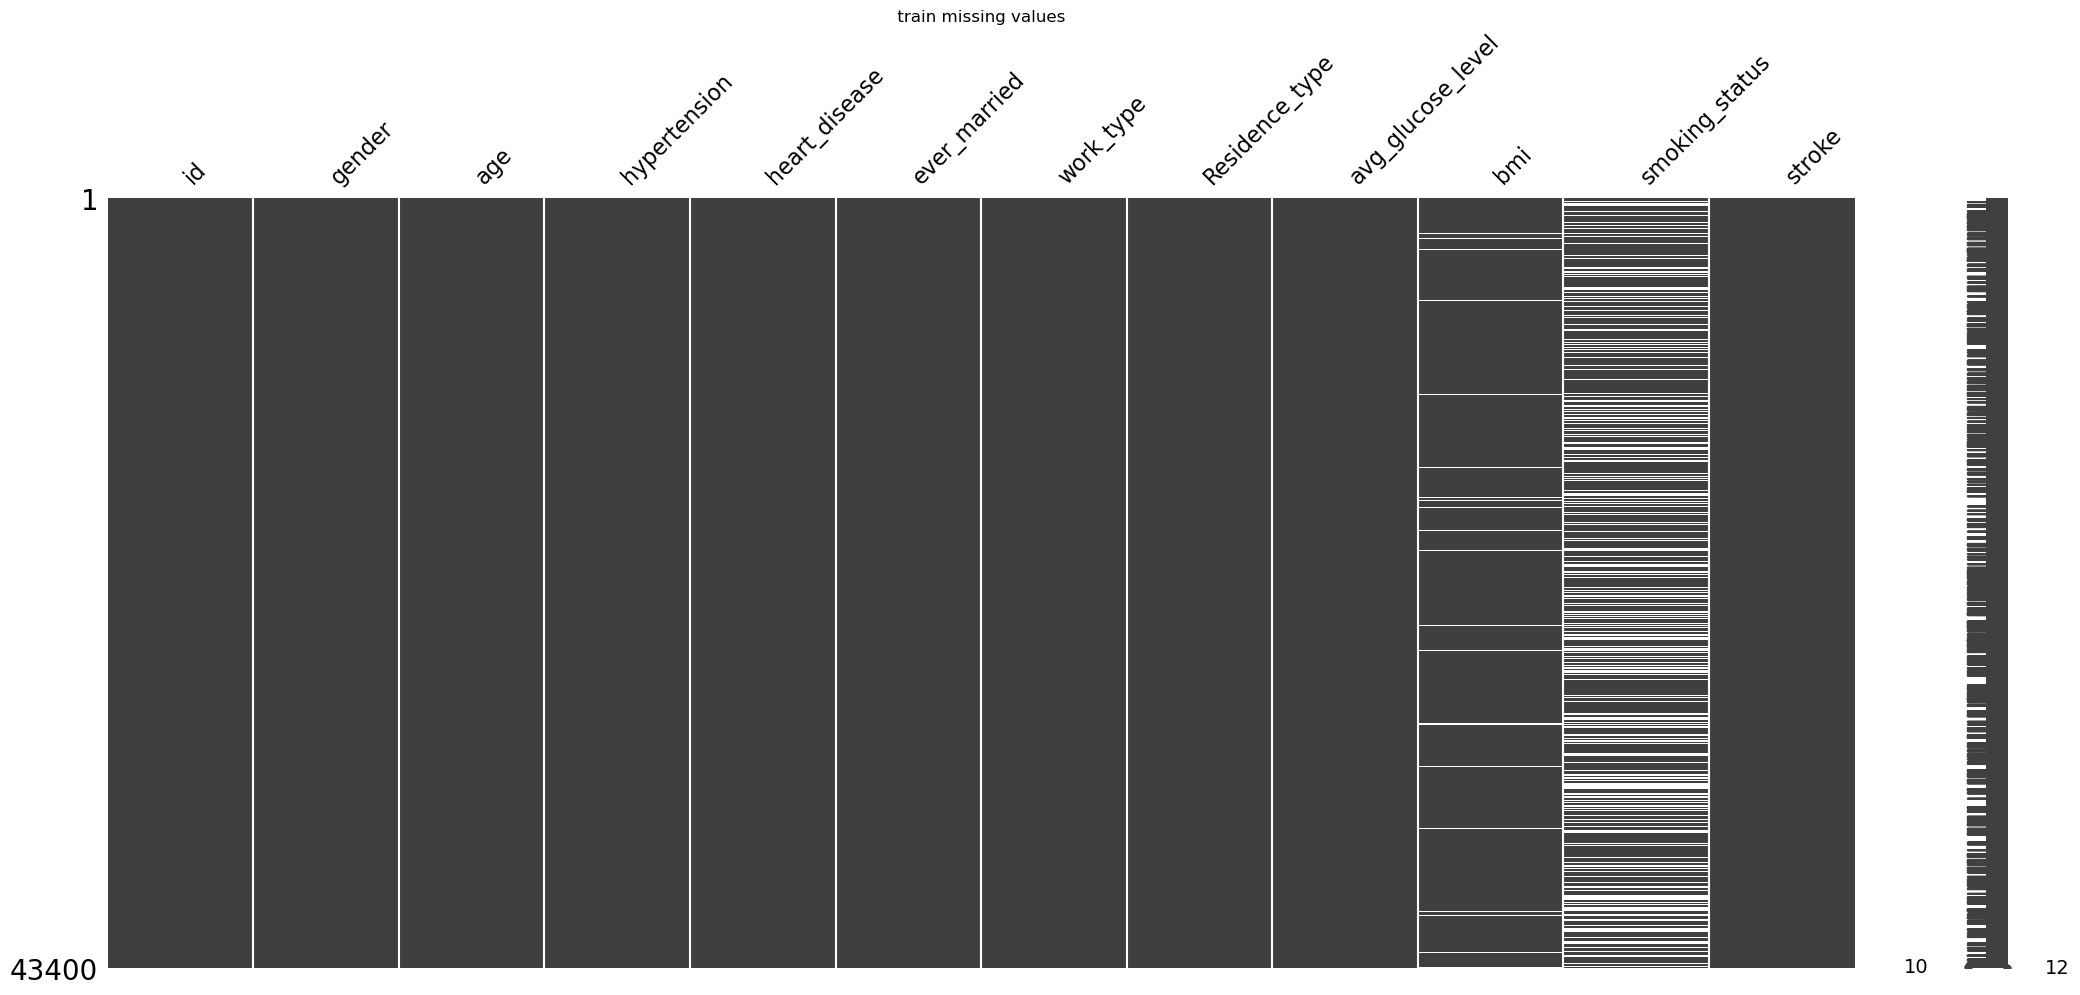

In [175]:
ms.matrix(train)
plt.title(" train missing values ")
plt.show()

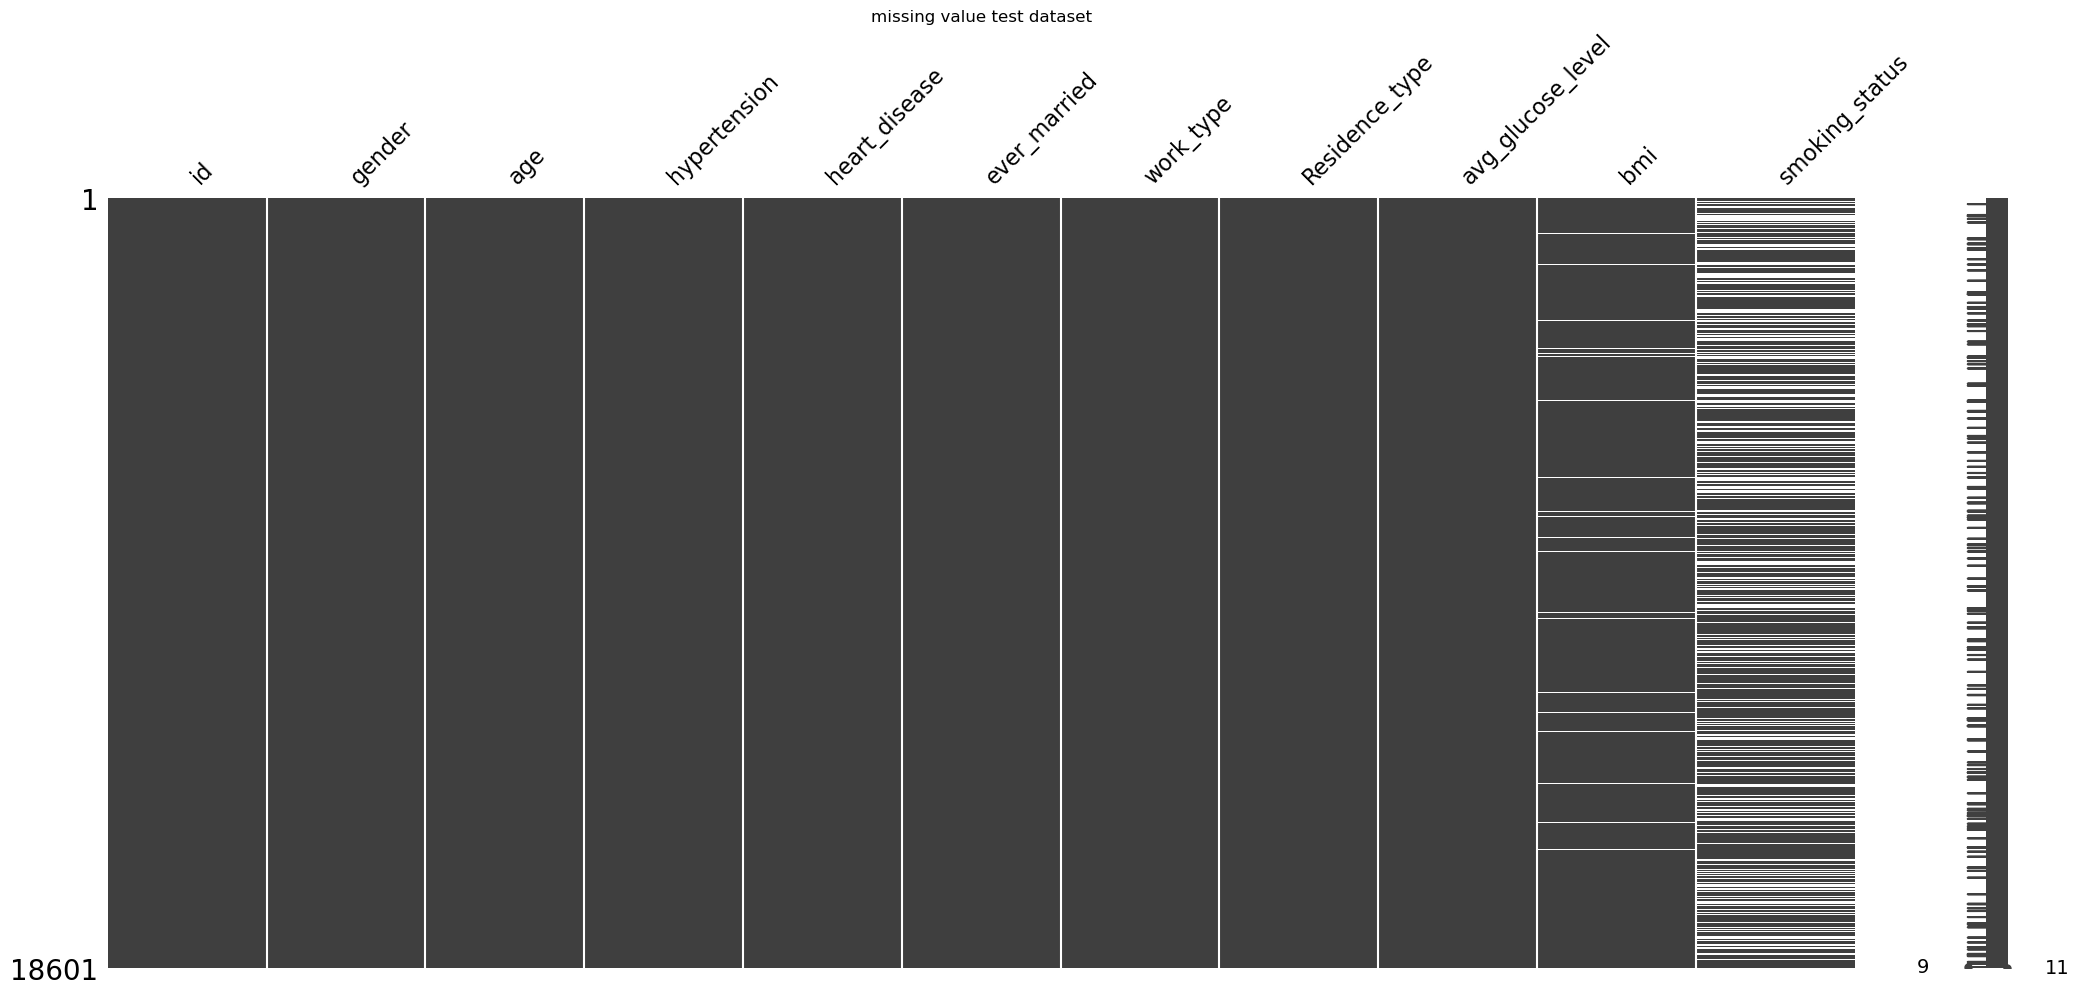

In [176]:
ms.matrix(test)
plt.title("missing value test dataset")
plt.show()

In [177]:
# removing missing values 
# we will simply remove  or drop the columns which are having null values 

In [178]:
train_data=train.dropna(axis=0,how="any")
test_data=test.dropna(axis=0,how="any")

In [179]:
train_data.shape


(29072, 12)

In [180]:
test_data.shape

(12423, 11)

In [181]:
# lets visualize the the data after 

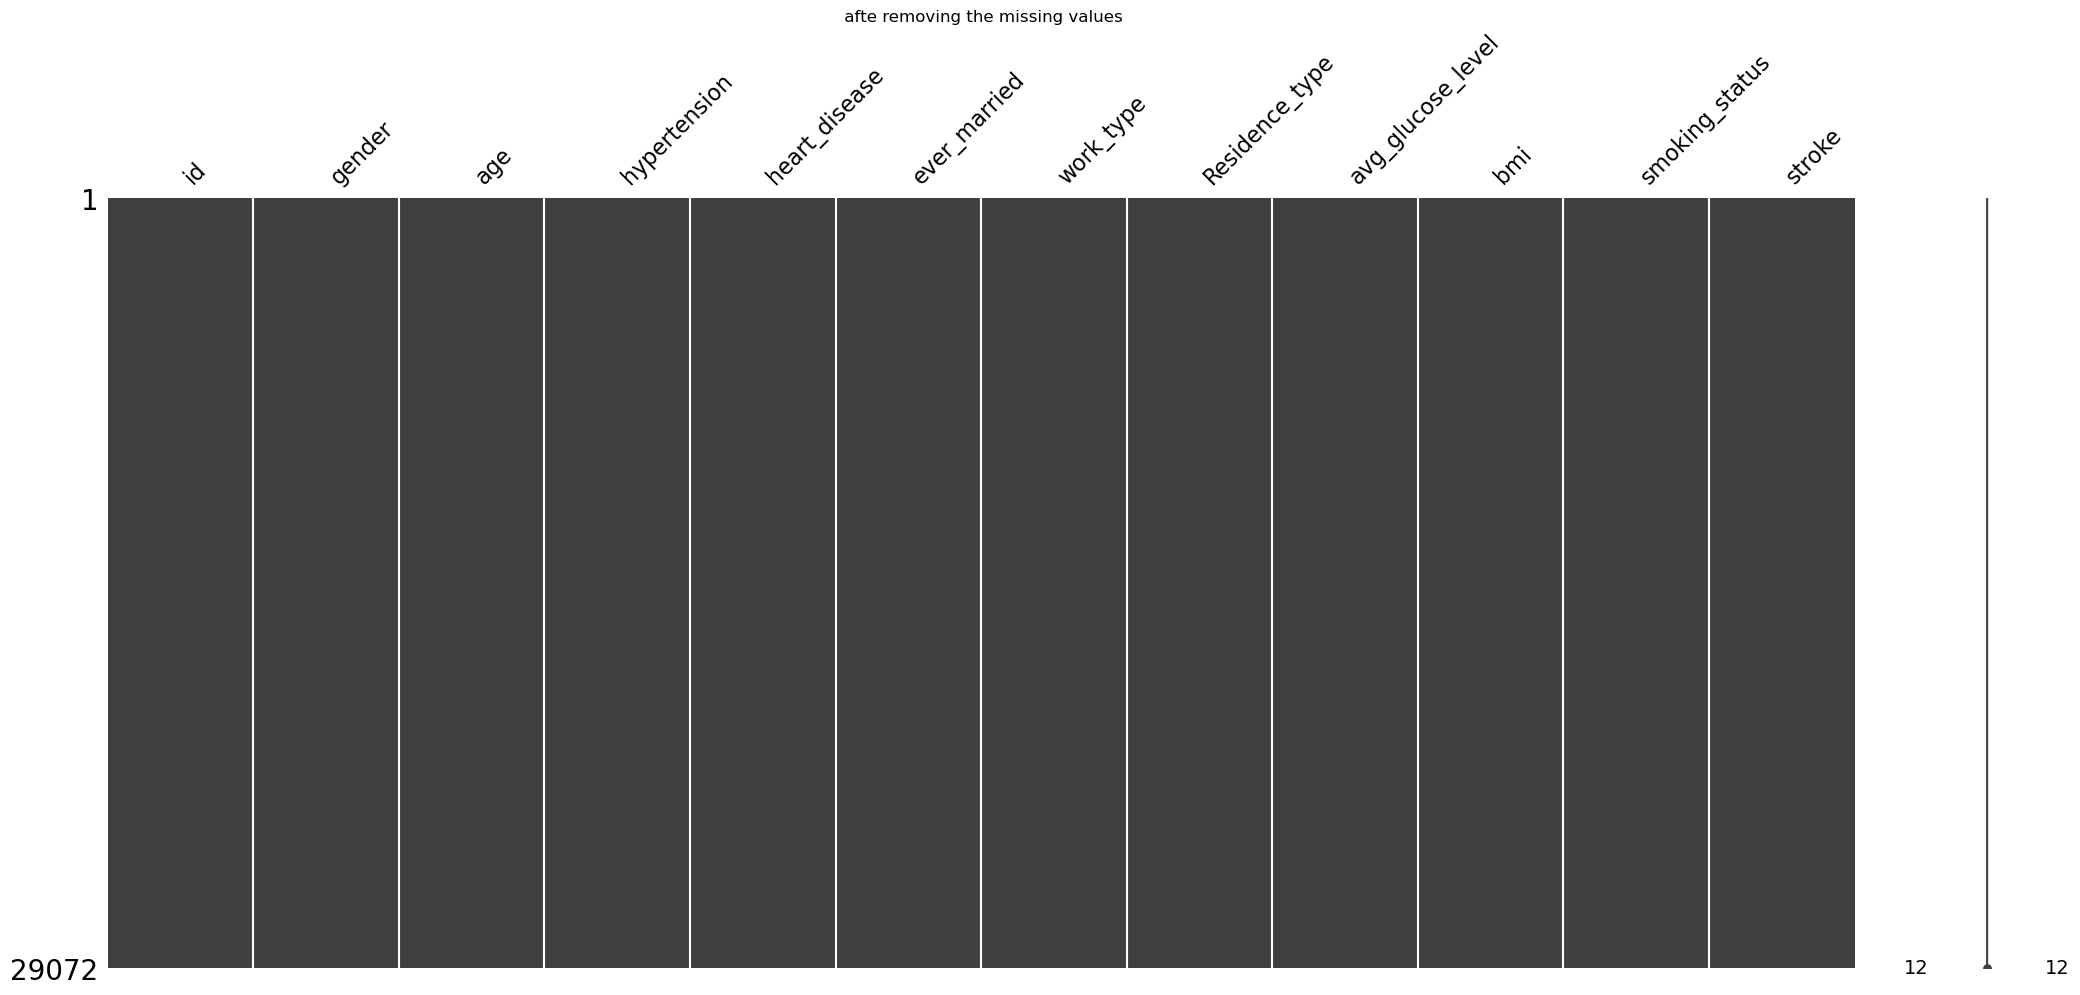

In [182]:
ms.matrix(train_data)
plt.title(" afte removing the missing values")
plt.show()

In [183]:
#lets reconize the data patters i mean data balancing both using bar plot and numerically 

In [184]:
train_data["stroke"].value_counts()

stroke
0    28524
1      548
Name: count, dtype: int64

In [185]:
train_data["stroke"].unique()

array([0, 1], dtype=int64)

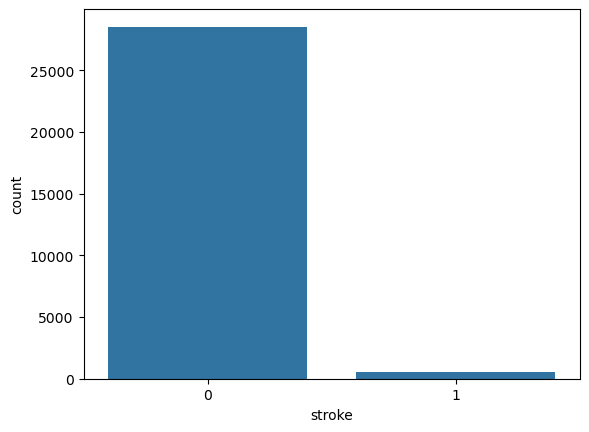

In [186]:
sns.countplot(x=train_data["stroke"])
plt.show()

In [187]:
# lest draw bar plott

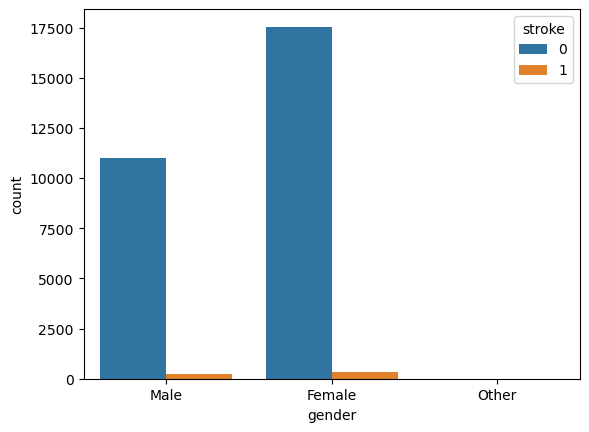

<Figure size 1000x800 with 0 Axes>

In [188]:
sns.countplot(x=train_data["gender"],hue=train_data["stroke"])
plt.figure(figsize=(10,8))
plt.show()

In [189]:
train_data.groupby(["gender"])["stroke"].value_counts()

gender  stroke
Female  0         17539
        1           313
Male    0         10978
        1           235
Other   0             7
Name: count, dtype: int64

In [190]:
train_data["smoking_status"].value_counts()

smoking_status
never smoked       15747
formerly smoked     7099
smokes              6226
Name: count, dtype: int64

In [191]:
train_data.groupby(["gender"])["smoking_status"].value_counts()

gender  smoking_status 
Female  never smoked       10406
        formerly smoked     3926
        smokes              3520
Male    never smoked        5340
        formerly smoked     3167
        smokes              2706
Other   formerly smoked        6
        never smoked           1
Name: count, dtype: int64

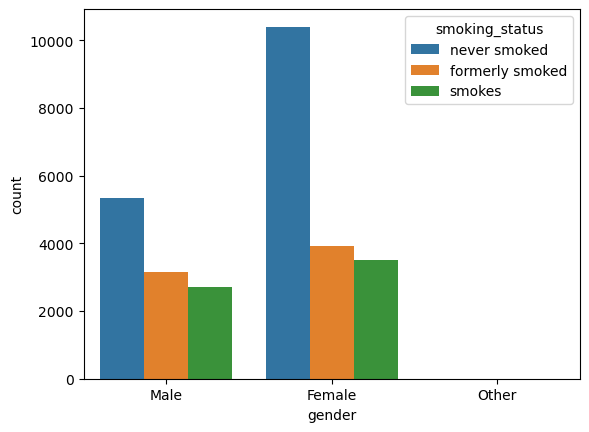

In [192]:
sns.countplot(x=train_data["gender"],hue=train_data["smoking_status"])
plt.show()

now lets seprate the categorical variable and int variable and after words convert the categoral varianble  to 
int variable using LABEL ENCODER 

In [193]:
str_data=train_data.select_dtypes(include=["object"])
str_dt=test_data.select_dtypes(include=["object"])

In [194]:
int_data=train_data.select_dtypes(include=["integer","float"])
int_dt=test_data.select_dtypes(include=["integer","float"])

In [195]:
str_data.head()

,gender,ever_married,work_type,Residence_type,smoking_status
1,Male,Yes,Private,Urban,never smoked
3,Female,Yes,Private,Rural,formerly smoked
6,Female,Yes,Private,Urban,formerly smoked
7,Female,Yes,Self-employed,Rural,never smoked
8,Female,Yes,Private,Rural,smokes


In [196]:
print(str_data.shape)
print(str_dt.shape)
print(int_data.shape)
print(int_dt.shape)


(29072, 5)
(12423, 5)
(29072, 7)
(12423, 6)


In [197]:
print(str_data.columns)
print(str_dt.columns)
print(int_data.columns)
print(int_dt.columns)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')
Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')
Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')
Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi'],
      dtype='object')


Now by using LABEL ENCODER  we can trans form all the obect or categorical variable into integer 

In [198]:
from sklearn.preprocessing import LabelEncoder


In [199]:
label=LabelEncoder()

In [200]:
features= str_data.apply(label.fit_transform)

In [201]:
features.head()

,gender,ever_married,work_type,Residence_type,smoking_status
1,1,1,2,1,1
3,0,1,2,0,0
6,0,1,2,1,0
7,0,1,3,0,1
8,0,1,2,0,2


In [202]:
features=features.join(int_data)

In [203]:
features.head()


,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
1,1,1,2,1,1,30468,58.0,1,0,87.96,39.2,0
3,0,1,2,0,0,56543,70.0,0,0,69.04,35.9,0
6,0,1,2,1,0,52800,52.0,0,0,77.59,17.7,0
7,0,1,3,0,1,41413,75.0,0,1,243.53,27.0,0
8,0,1,2,0,2,15266,32.0,0,0,77.67,32.3,0


In [204]:
features.shape

(29072, 12)

In [205]:
test1=str_dt.apply(label.fit_transform)
Test=test1.join(int_dt)

In [206]:
Test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,1,2,1,0,36306,80.0,0,0,83.84,21.1
1,0,1,3,0,0,61829,74.0,0,1,179.50,26.0
4,0,1,0,0,1,40801,63.0,0,0,83.57,27.6
5,0,1,2,1,1,9348,66.0,1,0,219.98,32.2
7,1,1,0,1,1,60512,46.0,0,0,120.80,32.5


In [207]:
# lets MODELLING THE DATA AAND PREDICTING THE DATA 

In [208]:
features.shape

(29072, 12)

In [209]:
x_train=features.drop(["stroke"],axis=1)
x_train.shape

(29072, 11)

In [210]:
y_train=features["stroke"]
y_train.head()

1    0
3    0
6    0
7    0
8    0
Name: stroke, dtype: int64

In [211]:
y_train.shape

(29072,)

In [212]:
# lets start MODELLING

In [213]:
# first start by usining train test split 

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train)

In [216]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21804, 11)
(7268, 11)
(21804,)
(7268,)


In [217]:
x_train.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
40691,0,1,2,1,1,64822,79.0,0,0,64.20,30.6
26113,1,1,3,0,1,72243,44.0,0,0,74.90,29.8
26563,0,0,0,1,1,44082,55.0,0,0,109.58,31.2
34339,0,1,2,0,1,12072,57.0,0,0,183.49,44.1
21936,0,1,0,0,1,9334,77.0,0,1,226.82,25.6


In [218]:
y_train.head()

40691    1
26113    0
26563    0
34339    0
21936    0
Name: stroke, dtype: int64

In [219]:
# here comes the algoritm fitting part let firsty use naive byes classification algo based in gaussian nb

In [220]:
x_test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
30598,0,1,2,0,2,8943,26.0,0,0,88.85,20.2
12919,0,1,0,0,1,61137,74.0,0,0,63.26,26.8
23215,0,1,2,0,2,51654,50.0,0,0,58.32,31.6
17798,0,1,2,1,0,51998,33.0,0,0,117.34,33.8
16679,1,0,2,1,2,17456,24.0,0,0,105.69,30.2


In [221]:
y_test.head()

30598    0
12919    0
23215    0
17798    0
16679    0
Name: stroke, dtype: int64

In [222]:
from sklearn.naive_bayes import GaussianNB

In [223]:
model=GaussianNB()

In [224]:
model.fit(x_train,y_train)

GaussianNB()

In [225]:
predict=model.predict(x_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [226]:
# lets see the test score of the gaussian nb

In [227]:
test_score=model.score(x_test,y_test)
print("NB TEST SCORE:",test_score)

NB TEST SCORE: 0.9772977435332967


# LEST SEE THE CONFUSION MATRIX 

In [228]:
nb_conf_mtr=pd.crosstab(y_test,predict)
nb_conf_mtr

col_0,0,1
stroke,,
0,7094,40
1,125,9


In [229]:
# lets have complete report for naive bayes model 

In [230]:
from sklearn.metrics import classification_report

In [231]:
nbreport=classification_report(y_test,predict)
print(nbreport)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7134
           1       0.18      0.07      0.10       134

    accuracy                           0.98      7268
   macro avg       0.58      0.53      0.54      7268
weighted avg       0.97      0.98      0.97      7268



#DECISION TREE MODELLING 

In [232]:
from sklearn.tree import DecisionTreeClassifier

In [233]:
dt_mod=DecisionTreeClassifier()
dt_mod.fit(x_train,y_train)

DecisionTreeClassifier()

In [234]:
y_predict=dt_mod.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [235]:
# lest see accuracy score

In [236]:
ts_dt_score=dt_mod.score(x_test,y_test)
print(" decision tree classifier score:",ts_dt_score)

 decision tree classifier score: 0.9640891579526693


In [237]:
# lets have confusion matrix 

In [238]:
dt_conf_mtr=pd.crosstab(y_test,y_predict)
dt_conf_mtr

col_0,0,1
stroke,,
0,6994,140
1,121,13


In [239]:
# decision tree classification report 

In [240]:
dectree_report=classification_report(y_test,y_predict)
print(dectree_report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7134
           1       0.08      0.10      0.09       134

    accuracy                           0.96      7268
   macro avg       0.53      0.54      0.54      7268
weighted avg       0.97      0.96      0.97      7268



RANDOM FOREST

In [241]:
from sklearn.ensemble import RandomForestClassifier

In [242]:
rfc=RandomForestClassifier(n_estimators=100)

In [243]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [244]:
y_pred_rfc=rfc.predict(x_test)

In [245]:
# lets ahve confusion matrix 

In [246]:
print(pd.crosstab(y_test,y_pred_rfc))

col_0      0
stroke      
0       7134
1        134


In [247]:
import warnings
warnings.filterwarnings("ignore")
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7134
           1       0.00      0.00      0.00       134

    accuracy                           0.98      7268
   macro avg       0.49      0.50      0.50      7268
weighted avg       0.96      0.98      0.97      7268



In [290]:
rfc_score=rfc.score(x_test,y_test)
rfc_score

0.9998165474224913

# lets do it with MLPC CLASSIFIER 

In [249]:
from sklearn.neural_network import MLPClassifier

In [250]:
mlp=MLPClassifier()

In [251]:
mlp.fit(x_train,y_train)

MLPClassifier()

In [252]:
y_pred_mlp=mlp.predict(x_test)
y_pred_mlp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [292]:
mlp_score=mlp.score(x_test,y_test)
mlp_score

0.9809209319390938

In [254]:
# lets cross validating the accuracies by using cross validation score

In [255]:
from sklearn.model_selection import cross_val_score

In [256]:
# cv for gaussianb

In [257]:
cross_val_score(model,x_train,y_train,cv = 20, scoring='accuracy').mean()

0.975967969794566

In [258]:
#cv for decision_tree

In [259]:
cross_val_score(dt_mod,x_train,y_train,cv=20,scoring="accuracy").mean()

0.9596405536541679

In [260]:
#cross val score for random forest classifier

In [261]:
cross_val_score(rfc,x_train,y_train,cv=20,scoring="accuracy").mean()

0.9810127061277004

In [262]:
# cross val score of mlp classifier 

In [263]:
cross_val_score(mlp,x_train,y_train,cv=20,scoring="accuracy").mean()

0.9799577863924183

APPLYING PCA (PRINCIPAL COMPONENT ANALYSIS)

In [264]:
from sklearn.decomposition import PCA

In [265]:
pca=PCA(n_components=3)

In [266]:
principalComponents=pca.fit_transform(x_train)

In [267]:
from sklearn.model_selection import train_test_split

In [268]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train)

In [269]:
model_2=GaussianNB()

In [270]:
model_2.fit(x_train,y_train)

GaussianNB()

In [271]:
test_score_1=model_2.score(x_test,y_test)
print("test score after pca",test_score_1)

test score after pca 0.9745000917262887


In [272]:
# decision tree classifier after pca

In [273]:
dt_mod2=DecisionTreeClassifier()

In [274]:
dt_mod2.fit(x_train,y_train)

DecisionTreeClassifier()

In [275]:
ts_dt_score2=dt_mod2.score(x_test,y_test)
print(" score after pcs in dt:",ts_dt_score2)

 score after pcs in dt: 0.9607411484131352


In [276]:
# new model random forest classifier after pca

In [277]:
rfc1=RandomForestClassifier(n_estimators=100)

In [278]:
rfc1.fit(x_train,y_train)

RandomForestClassifier()

In [279]:
y_pred_rfc1=rfc1.predict(x_test)
y_pred_rfc1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [280]:
print(pd.crosstab(y_test,y_pred_rfc1))

col_0      0
stroke      
0       5348
1        103


In [296]:
rfc1_score=rfc1.score(x_test,y_test)
rfc1_score

0.9811043845166024

In [298]:
mlp1=MLPClassifier()
mlp1.fit(x_train,y_train)
y_pred_mlp1=mlp1.predict(x_test)
mlp1_score=mlp1.score(x_test,y_test)
mlp1_score

0.979453311319024

In [283]:
# lest claculate cross validation score for each model after pca

In [284]:
cross_val_score(model_2,x_train,y_train,cv=20,scoring="accuracy").mean()

0.9750502763704052

In [285]:
cross_val_score(dt_mod2,x_train,y_train,cv=20,scoring="accuracy").mean()

0.9603125663992245

In [286]:
cross_val_score(rfc1,x_train,y_train,cv=20,scoring="accuracy").mean()

0.9809823643660239

In [287]:
cross_val_score(mlp1,x_train,y_train,cv=20,scoring="accuracy").mean()

0.9808599653452161

In [300]:
x=pd.DataFrame([test_score,ts_dt_score,rfc_score,mlp_score,"SCORE AFTER PCA",test_score_1,ts_dt_score2,rfc1_score,mlp1_score])
print(x,end=" ")

                 0
0         0.977298
1         0.964089
2         0.999817
3         0.980921
4  SCORE AFTER PCA
5           0.9745
6         0.960741
7         0.981104
8         0.979453 